In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error,cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r"C:\Users\BHOOMISH\OneDrive\Desktop\credit_record.csv")
df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [3]:
df1=pd.read_csv(r"C:\Users\BHOOMISH\OneDrive\Desktop\application_record.csv")

In [4]:
df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [5]:
df.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


In [9]:
df["STATUS"].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [10]:
df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [11]:
df['target']=df["STATUS"]
df['target'].replace('X',0,inplace=True)
df['target'].replace('C',0,inplace=True)
df['target']=df['target'].astype(int)
df.loc[df['target']>=1,'target']=1

In [12]:
df

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [13]:
df.drop("STATUS",axis=1,inplace=True)

In [14]:
df

,ID,MONTHS_BALANCE,target
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [15]:
final = pd.merge(df,df1,how="inner",on=['ID'])

In [16]:
final

,ID,MONTHS_BALANCE,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777711,5150487,-26,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777712,5150487,-27,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
777713,5150487,-28,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [17]:
final["DAYS_BIRTH"]

0        -12005
1        -12005
2        -12005
3        -12005
4        -12005
          ...  
777710   -19398
777711   -19398
777712   -19398
777713   -19398
777714   -19398
Name: DAYS_BIRTH, Length: 777715, dtype: int64

In [18]:
final["AGE_YEARS"]=round(-final["DAYS_BIRTH"]/365,0)

In [19]:
final["MONTH_BALANCE"]=round(-final["MONTHS_BALANCE"],0)

In [20]:
final["YEARS_EMPLOYED"]=round(-final["DAYS_EMPLOYED"]/365,0)

In [21]:
final

,ID,MONTHS_BALANCE,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,MONTH_BALANCE,YEARS_EMPLOYED
0,5008804,0,0,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,NaN,2.0,33.0,0,12.0
1,5008804,-1,0,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,NaN,2.0,33.0,1,12.0
2,5008804,-2,0,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,NaN,2.0,33.0,2,12.0
3,5008804,-3,0,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,NaN,2.0,33.0,3,12.0
4,5008804,-4,0,M,Y,Y,0,427500.0,Working,Higher education,...,-4542,1,1,0,0,NaN,2.0,33.0,4,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,-25,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,...,-2166,1,0,0,0,Drivers,2.0,53.0,25,6.0
777711,5150487,-26,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,...,-2166,1,0,0,0,Drivers,2.0,53.0,26,6.0
777712,5150487,-27,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,...,-2166,1,0,0,0,Drivers,2.0,53.0,27,6.0
777713,5150487,-28,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,...,-2166,1,0,0,0,Drivers,2.0,53.0,28,6.0


In [22]:
final.drop("MONTHS_BALANCE",axis=1,inplace=True)

In [23]:
final.drop("DAYS_EMPLOYED",axis=1,inplace=True)

In [24]:
final.drop("DAYS_BIRTH",axis=1,inplace=True)

In [25]:
final

,ID,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,MONTH_BALANCE,YEARS_EMPLOYED
0,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33.0,0,12.0
1,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33.0,1,12.0
2,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33.0,2,12.0
3,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33.0,3,12.0
4,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,33.0,4,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Drivers,2.0,53.0,25,6.0
777711,5150487,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Drivers,2.0,53.0,26,6.0
777712,5150487,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Drivers,2.0,53.0,27,6.0
777713,5150487,0,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Drivers,2.0,53.0,28,6.0


In [26]:
final.drop(["FLAG_OWN_CAR","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_PHONE","FLAG_EMAIL","FLAG_WORK_PHONE"],axis=1,inplace=True)

In [27]:
final

,ID,target,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,MONTH_BALANCE,YEARS_EMPLOYED
0,5008804,0,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,NaN,2.0,33.0,0,12.0
1,5008804,0,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,NaN,2.0,33.0,1,12.0
2,5008804,0,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,NaN,2.0,33.0,2,12.0
3,5008804,0,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,NaN,2.0,33.0,3,12.0
4,5008804,0,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,NaN,2.0,33.0,4,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,0,M,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,Drivers,2.0,53.0,25,6.0
777711,5150487,0,M,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,Drivers,2.0,53.0,26,6.0
777712,5150487,0,M,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,Drivers,2.0,53.0,27,6.0
777713,5150487,0,M,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,Drivers,2.0,53.0,28,6.0


In [28]:
for col in final.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(final[col].unique())
  final[col]=label_encoder.transform(final[col])

In [29]:
final["MONTH_BALANCE"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

<Axes: >

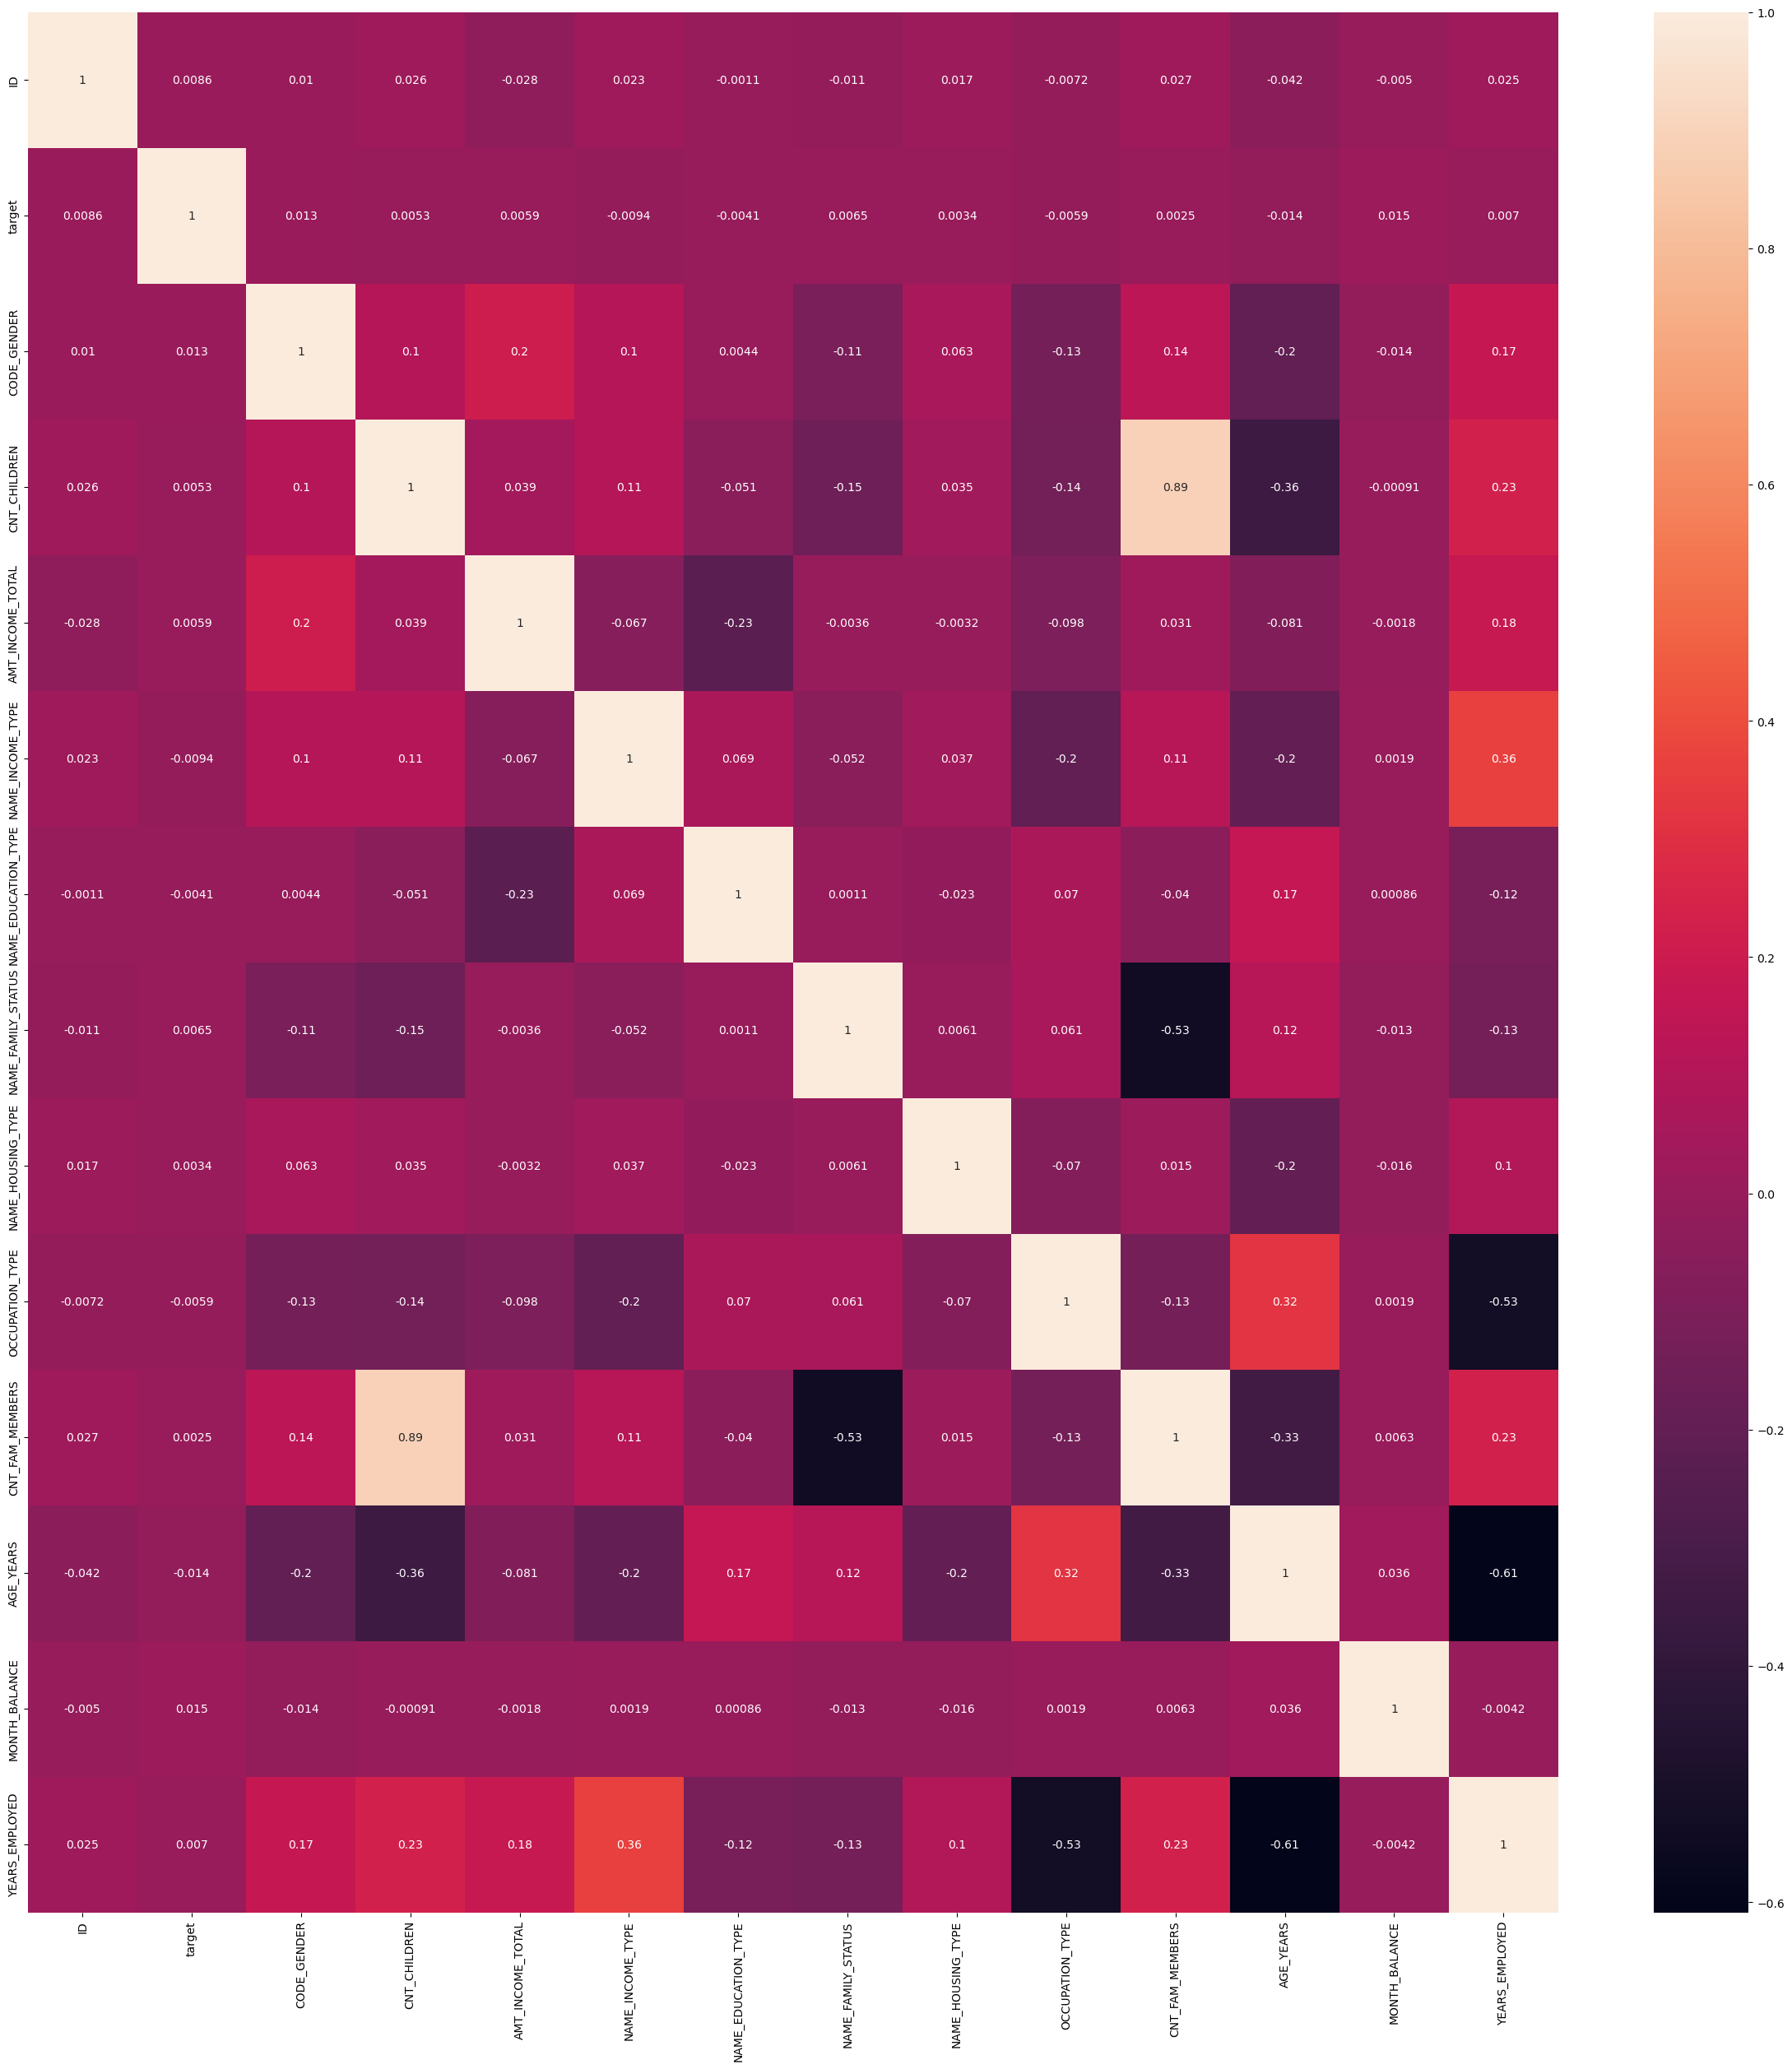

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(final.corr(),annot=True)

In [31]:
final.drop(["CNT_CHILDREN"],axis=1,inplace = True)

In [32]:
final

,ID,target,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,MONTH_BALANCE,YEARS_EMPLOYED
0,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,0,12.0
1,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,1,12.0
2,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,2,12.0
3,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,3,12.0
4,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,4,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,25,6.0
777711,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,26,6.0
777712,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,27,6.0
777713,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,28,6.0


<Axes: >

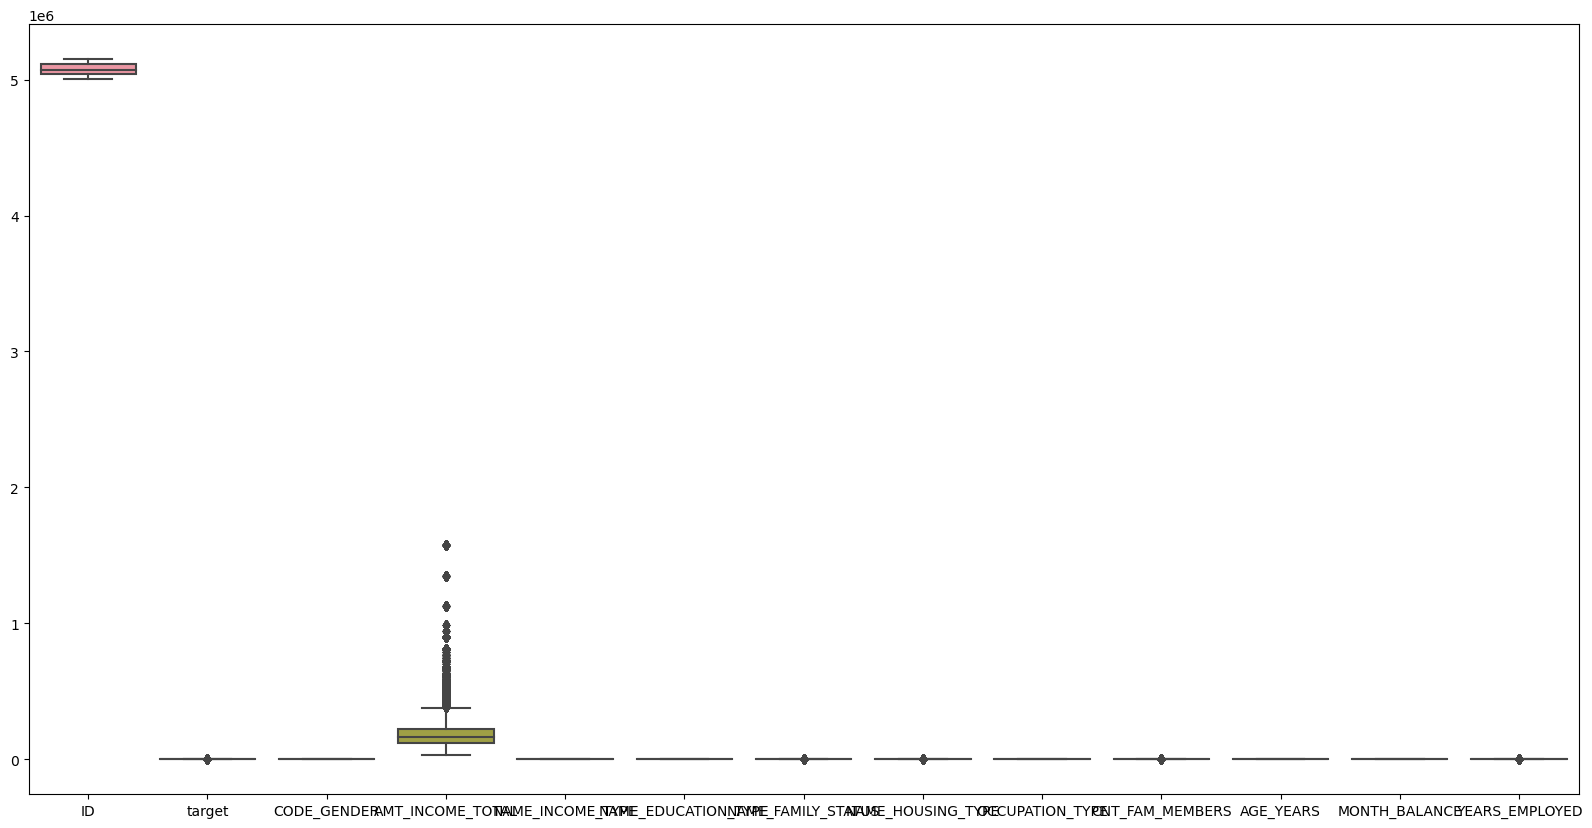

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(final)

In [34]:
final["YEARS_EMPLOYED"].unique()

array([ 1.200e+01,  3.000e+00,  8.000e+00, -1.001e+03,  2.000e+00,
        4.000e+00,  6.000e+00,  9.000e+00,  1.900e+01,  1.500e+01,
        5.000e+00,  1.300e+01,  7.000e+00,  1.700e+01,  3.000e+01,
        1.600e+01,  1.100e+01,  1.000e+00,  1.000e+01,  2.400e+01,
        1.400e+01,  2.500e+01,  0.000e+00,  2.000e+01,  2.700e+01,
        1.800e+01,  2.100e+01,  2.300e+01,  2.200e+01,  2.800e+01,
        3.900e+01,  3.200e+01,  3.300e+01,  3.700e+01,  2.600e+01,
        3.800e+01,  3.100e+01,  2.900e+01,  3.500e+01,  3.400e+01,
        4.100e+01,  4.000e+01,  3.600e+01,  4.200e+01,  4.300e+01])

In [35]:
final

,ID,target,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,MONTH_BALANCE,YEARS_EMPLOYED
0,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,0,12.0
1,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,1,12.0
2,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,2,12.0
3,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,3,12.0
4,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,4,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,25,6.0
777711,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,26,6.0
777712,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,27,6.0
777713,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,28,6.0


In [36]:
final['YEARS_EMPLOYED1']=round(-final["YEARS_EMPLOYED"]/365,0)
final.loc[final['YEARS_EMPLOYED1']<0,'YEARS_EMPLOYED1']=0

In [37]:
final.drop(["YEARS_EMPLOYED"],axis=1,inplace=True)

In [38]:
final

,ID,target,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,MONTH_BALANCE,YEARS_EMPLOYED1
0,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,0,-0.0
1,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,1,-0.0
2,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,2,-0.0
3,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,3,-0.0
4,5008804,0,1,427500.0,4,1,0,4,18,2.0,33.0,4,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,25,-0.0
777711,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,26,-0.0
777712,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,27,-0.0
777713,5150487,0,1,202500.0,4,4,1,1,4,2.0,53.0,28,-0.0


# logistic reg

In [39]:
x=final[['CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'MONTH_BALANCE', 'YEARS_EMPLOYED1']]
y=final["target"]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [41]:
#standardize the feature using standardscalar
scaler=StandardScaler()
x_train1=scaler.fit_transform(x_train)
x_test1=scaler.transform(x_test)

In [42]:
model = LogisticRegression()
model.fit(x_train1,y_train)
y_pred=model.predict(x_test1)

In [43]:
model.score(x_train1,y_train)

0.9850861176652116

In [44]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_reg=classification_report(y_test,y_pred)

print("accuracy : ",accuracy*100)
print("confusion matrix : ",conf_matrix)
print("classification regression : ", classification_reg)
kappa_score = cohen_kappa_score(y_test,y_pred)
print("kappa score",kappa_score)

C:\Users\BHOOMISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BHOOMISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy :  98.52388085609766
confusion matrix :  [[153247      0]
 [  2296      0]]
classification regression :                precision    recall  f1-score   support

           0       0.99      1.00      0.99    153247
           1       0.00      0.00      0.00      2296

    accuracy                           0.99    155543
   macro avg       0.49      0.50      0.50    155543
weighted avg       0.97      0.99      0.98    155543

kappa score 0.0


C:\Users\BHOOMISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# decision tree 

In [45]:
x1=final[['CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'MONTH_BALANCE', 'YEARS_EMPLOYED1']]
y1=final["target"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,train_size=0.8,random_state=42)

In [47]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dec_tree.predict(x_test)

In [49]:
dec_tree.score(x_train,y_train)

0.9908096153475244

In [50]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_reg=classification_report(y_test,y_pred)

print("ACCURACY : ",accuracy*100)
print("CONFUSSION MATRIX : ",conf_matrix)
print("CLASSIFICATION REGRESSION : ", classification_reg)
kappa_score = cohen_kappa_score(y_test,y_pred)
print("kappa score",kappa_score)

ACCURACY :  98.18699652186213
CONFUSSION MATRIX :  [[152295    952]
 [  1868    428]]
CLASSIFICATION REGRESSION :                precision    recall  f1-score   support

           0       0.99      0.99      0.99    153247
           1       0.31      0.19      0.23      2296

    accuracy                           0.98    155543
   macro avg       0.65      0.59      0.61    155543
weighted avg       0.98      0.98      0.98    155543

kappa score 0.22426437472379424


In [51]:
x2=final[['CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'MONTH_BALANCE', 'YEARS_EMPLOYED1']]
y2=final["target"]


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x2,y2,train_size=0.8,random_state=42)

In [53]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [54]:
accuracy_rf=accuracy_score(y_test,y_pred)
print("decision tree accuracy",accuracy_rf*100)

decision tree accuracy 98.2602881518294
